# Regression Exercise 

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

** Import the cal_housing_clean.csv file with pandas. **

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('cal_housing_clean.csv')

display(pd.DataFrame(df.columns))

display(df.describe())

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,0
0,housingMedianAge
1,totalRooms
2,totalBedrooms
3,population
4,households
5,medianIncome
6,medianHouseValue


,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


** Separate it into a training (70%) and testing set(30%).**

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['medianHouseValue'])
y = df[['medianHouseValue']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('X_train.shape[0]:',X_train.shape[0])
print('X_test.shape[0]:',X_test.shape[0])

X_train.shape[0]: 13828
X_test.shape[0]: 6812


### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [3]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

X_train = pd.DataFrame(x_scaler.transform(X_train),columns=list(X.columns), index=X_train.index)
X_test = pd.DataFrame(x_scaler.transform(X_test),columns=list(X.columns), index=X_test.index)

y_train = pd.DataFrame(y_scaler.transform(y_train),columns=list(y.columns),index=y_train.index)
y_test = pd.DataFrame(y_scaler.transform(y_test),columns=list(y.columns),index=y_test.index)

### Create Feature Columns

** Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

In [4]:
feature_column_list = []

for key in list(X_train.columns):
    feature_column_list.append(tf.feature_column.numeric_column(key))
    
display(feature_column_list)

[_NumericColumn(key='housingMedianAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='totalRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='totalBedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='households', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='medianIncome', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [5]:
input_fn_train = tf.estimator.inputs.pandas_input_fn(x = X_train,
                                                     y = y_train.squeeze(), #squezze df into series
                                                     batch_size=128, 
                                                     num_epochs=1000,
                                                     shuffle=True)
input_fn_train

<function tensorflow.python.estimator.inputs.pandas_io.pandas_input_fn.<locals>.input_fn()>

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [6]:
model = tf.estimator.DNNRegressor(hidden_units=[10,10,10],
                                  feature_columns = feature_column_list)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpm_ak477i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb264823c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


##### ** Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [7]:
model.train(input_fn=input_fn_train, steps = 10000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpm_ak477i/model.ckpt.
INFO:tensorflow:loss = 35.413, step = 1
INFO:tensorflow:global_step/sec: 426.203
INFO:tensorflow:loss = 2.4868472, step = 101 (0.237 sec)
INFO:tensorflow:global_step/sec: 577.734
INFO:tensorflow:loss = 3.224193, step = 201 (0.172 sec)
INFO:tensorflow:global_step/sec: 597.464
INFO:tensorflow:loss = 2.8713849, step = 301 (0.167 sec)
INFO:tensorflow:global_step/sec: 611.259
INFO:tensorflow:loss 

INFO:tensorflow:loss = 2.6334558, step = 6901 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.763
INFO:tensorflow:loss = 2.1637077, step = 7001 (0.158 sec)
INFO:tensorflow:global_step/sec: 640.271
INFO:tensorflow:loss = 2.2981224, step = 7101 (0.156 sec)
INFO:tensorflow:global_step/sec: 623.694
INFO:tensorflow:loss = 2.7231216, step = 7201 (0.161 sec)
INFO:tensorflow:global_step/sec: 642.124
INFO:tensorflow:loss = 1.8218164, step = 7301 (0.155 sec)
INFO:tensorflow:global_step/sec: 634.712
INFO:tensorflow:loss = 3.0290256, step = 7401 (0.158 sec)
INFO:tensorflow:global_step/sec: 634.36
INFO:tensorflow:loss = 3.6537774, step = 7501 (0.158 sec)
INFO:tensorflow:global_step/sec: 638.285
INFO:tensorflow:loss = 1.860919, step = 7601 (0.157 sec)
INFO:tensorflow:global_step/sec: 637.418
INFO:tensorflow:loss = 2.3625946, step = 7701 (0.156 sec)
INFO:tensorflow:global_step/sec: 637.555
INFO:tensorflow:loss = 2.1178555, step = 7801 (0.157 sec)
INFO:tensorflow:global_step/sec: 638.693
INFO:tensorf

** Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

In [8]:
def input_fn_predict(X_test_train):

    input_fn = tf.estimator.inputs.pandas_input_fn(x = X_test_train,
                                                    batch_size=128,
                                                    num_epochs=1, shuffle = False)
    return input_fn

def predict(X_test_train):
    predictions = [pred['predictions'][0] for pred in list(model.predict(input_fn=input_fn_predict(X_test_train)))]
    predictions = np.array(predictions).reshape(-1,1)
    return predictions

In [9]:
y_train_pred = predict(X_train)
y_test_pred = predict(X_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpm_ak477i/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpm_ak477i/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


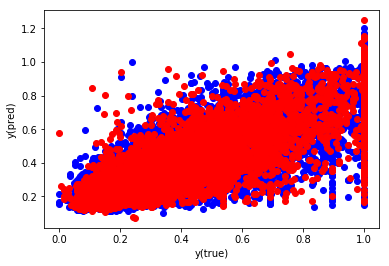

In [14]:
import matplotlib.pyplot as plt

plt.plot(y_train, y_train_pred,'bo')
plt.plot(y_test, y_test_pred,'ro')
plt.xlabel('y(true)')
plt.ylabel('y(pred)')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error

RMSE_train = mean_squared_error(y_train, y_train_pred)
RMSE_test = mean_squared_error(y_test, y_test_pred)

print('RMSE_train:',RMSE_train)
print('RMSE_test:',RMSE_test)

RMSE_train: 0.01886873257036307
RMSE_test: 0.019653861467637146


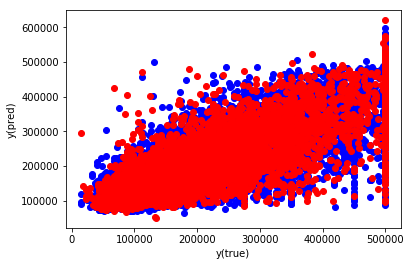

In [16]:
#rescale and plot
y_train_original = pd.DataFrame(y_scaler.inverse_transform(y_train),columns=y.columns,index=y_train.index)
y_test_original = pd.DataFrame(y_scaler.inverse_transform(y_test),columns=y.columns,index=y_test.index)

y_train_pred_inverse_scale = pd.DataFrame(y_scaler.inverse_transform(y_train_pred),columns=y.columns,index=y_train.index)
y_test_pred_inverse_scale = pd.DataFrame(y_scaler.inverse_transform(y_test_pred),columns=y.columns,index=y_test.index)

plt.plot(y_train_original, y_train_pred_inverse_scale ,'bo')
plt.plot(y_test_original, y_test_pred_inverse_scale,'ro')
plt.xlabel('y(true)')
plt.ylabel('y(pred)')
plt.show()

** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

# Great Job!